# What is Retrieval-Augmented Generation (RAG)?

**Retrieval-Augmented Generation (RAG)** is a process that enhances the output of a large language model (LLM) by retrieving relevant information from external knowledge sources before generating a response. While LLMs are trained on vast amounts of data, they can sometimes provide inaccurate or outdated information. RAG mitigates these issues by fetching authoritative and up-to-date information from external databases or document repositories, ensuring the generated output is more accurate and contextually relevant.


## Why is Retrieval-Augmented Generation Important?

LLMs are integral to artificial intelligence (AI) applications like chatbots and natural language processing (NLP) systems. However, LLMs face several challenges:

- **False Information**: When LLMs don’t have the answer, they might generate false information confidently.
- **Outdated Information**: LLMs are trained on static datasets, which may not reflect recent developments.
- **Non-Authoritative Sources**: Generated responses may not cite trusted sources.
- **Terminology Confusion**: LLMs may confuse terminology across different data sources.

These limitations can affect user trust. RAG addresses these challenges by enabling the LLM to retrieve relevant, trusted information from predefined sources, leading to more accurate and trustworthy responses.


## Benefits of Retrieval-Augmented Generation

1. **Cost-Effective Implementation**:
   - Instead of retraining expensive models, RAG allows you to augment existing LLMs by connecting them to domain-specific data sources.

2. **Access to Current Information**:
   - RAG allows LLMs to fetch the latest data from news sites, live social media feeds, or real-time APIs, ensuring the information is always up-to-date.

3. **Enhanced User Trust**:
   - Responses can be backed by source attribution, increasing transparency and confidence in the answers provided by the LLM.

4. **Increased Developer Control**:
   - Developers can manage the LLM’s information sources, update content, and fine-tune the system for different user contexts.

## How Does Retrieval-Augmented Generation Work?

1. **Create External Data**:
   - External data sources (e.g., APIs, databases, documents) are converted into embeddings (numerical representations) and stored in a **vector database**. This forms a knowledge library that the generative model can access.

2. **Retrieve Relevant Information**:
   - When a user submits a query, it is converted into a vector and matched with the most relevant documents in the vector database. This ensures the LLM receives accurate, contextually relevant information.

3. **Augment the LLM Prompt**:
   - The retrieved information is added to the original query as context, forming an augmented prompt. This helps the LLM generate more accurate and relevant responses.

4. **Update External Data**:
   - To keep the information current, external data sources and their embeddings are updated asynchronously through batch processing or real-time updates.

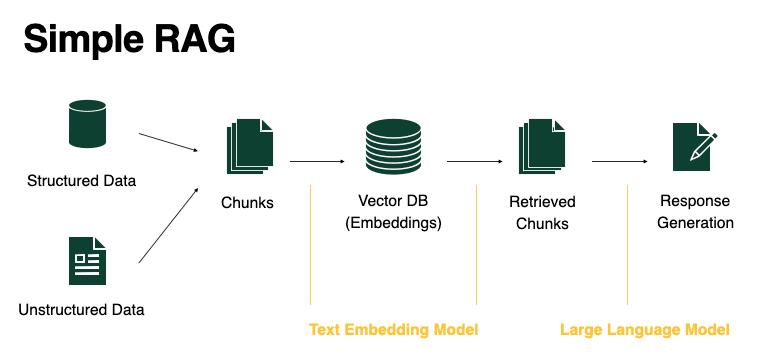

## Building a RAG Model

To implement this RAG-based system, we will follow these steps:

### Step 1: Data Preparation
- Load the dataset or documents containing the information that the QA bot will use to answer questions.
- Convert this data into embeddings using a model like **Cohere API** (or a similar generative model) to create numerical representations that can be stored in a vector database.

### Step 2: Storing Embeddings in Vectir Database
- Set up **Pinecone** as a vector database to store and retrieve document embeddings efficiently.

### Step 3: Query Processing and Information Retrieval
- When a user asks a question, convert the query into an embedding and use Pinecone to retrieve the most relevant document sections by comparing vector similarities.

### Step 4: Answer Generation
- Pass the retrieved document sections to the LLM (e.g., Cohere) along with the query. The LLM will use this context to generate a coherent and relevant answer.

### Step 5: Frontend Interface
- Develop a frontend using **Streamlit** or **Gradio** to allow users to upload documents, ask questions, and receive answers in real-time.

### Step 6: Testing and Refinement
- Test the model with multiple queries and documents to ensure it provides accurate and contextually relevant responses. Fine-tune the system based on performance and feedback.

### Step 7: Deployment and Containerization
- Dockerize the application for easy deployment and scalability, ensuring that it can handle large datasets and multiple queries efficiently.

## Install Necessary Libraries

- **Streamlit**: For creating the interactive web app.
- **PyPDF2**: For processing and extracting text from PDF files.
- **Cohere**: For using Cohere’s API to generate embeddings and responses.
- **Pinecone**: For creating and querying vector stores.
- **LangChain**: For splitting text, handling retrieval, and orchestrating the retrieval-augmented generation process.
- **FAISS**: Alternative to Pinecone for embedding storage and retrieval.


In [ ]:
!pip install sentence-transformers pymupdf groq faiss-cpu gradio -q
!pip install langchain langchain-core langchain-community langchain-chroma langchain-groq -q

## Import Libraries

In [ ]:
import sys
import warnings

from string import Template

import ipywidgets as widgets
from IPython.display import display

from langchain_groq import ChatGroq
from langchain_community.vectorstores import FAISS
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_community.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

# Building a **Retrieval-Augmented Generation (RAG)** Model

When building a **Retrieval-Augmented Generation (RAG)** model, it's crucial to properly handle and prepare the text data. Let's break down the initial steps for processing text from a PDF document, focusing on why each step is important.

## 1. Loading the PDF Document

```python
corpus = PyMuPDFLoader("sample.pdf").load()
```

### **Why Load the Document?**

To use the text from a PDF in our RAG model, we first need to extract the text content. The **PyMuPDFLoader** is a tool designed to read PDF files and extract their text. This step is essential because our model needs raw text data to work with.

### **What Happens Here?**

- **PyMuPDFLoader**: Think of this as a tool that opens and reads the PDF document, similar to how you would read a book.
- **.load()**: This function extracts the text and makes it available in a format we can work with, such as a string or list of text.

## 2. Splitting the Text into Chunks

```python
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=256)
```

### **Why Split the Text into Chunks?**

Large texts, like those from a PDF, can be overwhelming for models to handle in one go. By splitting the text into chunks, we make it easier for our model to process and retrieve relevant information. Smaller chunks are more manageable and ensure that the model can focus on specific parts of the text.

### **How Do We Do This?**

- **RecursiveCharacterTextSplitter**: This tool helps divide the text into smaller, more manageable pieces.
- **chunk_size=1024**: Each chunk will have a maximum of 1024 characters. This size is chosen to balance between too small and too large, ensuring each chunk contains enough information for effective processing.
- **chunk_overlap=256**: To ensure no important information is missed between chunks, we include a 256-character overlap. This means that part of one chunk will be included in the next, preserving context and continuity.

## 3. Practical Examples of Text Splitting

### **Example Query 1: Loading the PDF**

```python
corpus = PyMuPDFLoader("sample.pdf").load()
print(corpus[:500])
```

**Point To Remember:** After loading the PDF, we might want to see a sample of the text. This helps us verify that the text has been extracted correctly. The output will show the beginning of the document, giving us a glimpse into the content we are working with.

**Expected Output:**

```plaintext
"The sample PDF document contains various sections about product descriptions, data analysis, and charts. The first section introduces the company's mission statement..."
```

### **Example Query 2: Splitting the Text**

```python
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=256)
chunks = text_splitter.split_text(corpus)
print(f"Number of chunks: {len(chunks)}")
print(f"First chunk: {chunks[0]}")
print(f"Second chunk: {chunks[1]}")
```

**Point To Remember:** By splitting the text, we can manage it more effectively. We can check how many chunks have been created and examine the content of the first few chunks. This helps us understand how the document is being divided and ensures that the chunks contain meaningful sections of the text.

**Expected Output:**

```plaintext
Number of chunks: 5
First chunk: "The sample PDF document contains various sections about product descriptions, data analysis, and charts. The first section introduces the company's mission..."
Second chunk: "ny's mission statement and highlights the key values. The second section dives into the product portfolio with details about different offerings, specifications..."
```

## 4. Real-World Application

In a RAG model, each chunk of text is used to retrieve relevant information when a user query is made. The model searches through these chunks to find the most relevant pieces of information, which are then used to generate a response. This approach ensures that the model provides accurate and contextually relevant answers based on the content of the document.

### **Example Scenario**

Imagine a user asks: *"What is the mission statement of the company?"* 
The RAG model will retrieve the chunk containing the mission statement and use that information to craft a precise and relevant answer.


In [ ]:
"""
The PyMuPDFLoader class is used to load and read the PDF document.
The .load() method extracts the text from the PDF and stores it in the 'corpus' variable.
This text will be processed further to extract useful information.
"""

# Load the PDF document
corpus = PyMuPDFLoader("sample.pdf").load()

"""
The RecursiveCharacterTextSplitter class is used to divide the text into manageable chunks.
- chunk_size=1024: Each chunk will contain up to 1024 characters.
- chunk_overlap=256: There will be a 256-character overlap between consecutive chunks to ensure context is preserved.
This setup helps in processing large documents by breaking them into smaller, more manageable pieces.
"""

# Initialize the text splitter with specified parameters
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=256)

## Splitting the Document into Chunks

Once we have the text extracted from the PDF document, the next step is to split it into manageable chunks. This process is crucial for efficient processing and retrieval of information. Let’s break down this step in detail.

### Code to Split the Document

```python
# Split the document into chunks
chunks = text_splitter.split_documents(corpus)
```

**Explanation:**

- **`text_splitter.split_documents(corpus)`**:
  - **`text_splitter`**: This is an instance of the `RecursiveCharacterTextSplitter` class that we initialized earlier. It is configured to divide the text into chunks of a specified size with overlapping sections.
  - **`.split_documents(corpus)`**: This method takes the `corpus` variable, which contains the text extracted from the PDF, and splits it into chunks based on the parameters we defined earlier (chunk size and overlap). 

**Purpose:**
- The purpose of this operation is to break down the large text document into smaller, more manageable chunks. This facilitates more effective processing and retrieval by the model, as it can focus on specific sections of the text rather than handling the entire document at once.

### Checking the Number of Chunks

```python
# Check the number of chunks created
len(chunks)
```

**Explanation:**

- **`len(chunks)`**:
  - **`len()`**: This built-in Python function returns the number of items in an object. In this case, it returns the number of chunks created after splitting the document.
  - **`chunks`**: This variable holds the list of text chunks that were generated by the `split_documents` method. Each chunk is a segment of the original document, sized according to the parameters we set.

**Purpose:**
- Checking the number of chunks helps us understand how the document was divided. This can be useful for verifying that the text splitting process worked as intended and that the number of chunks aligns with our expectations. It also helps in assessing whether the chunk size and overlap parameters are appropriate for the given document.

By breaking the document into smaller chunks, we ensure that the model can efficiently process and retrieve relevant information, enhancing the overall performance of the system.


In [ ]:
"""
This snippet of code performs two key tasks:
1. Splits the document into smaller chunks using the `text_splitter` instance.
2. Counts the total number of chunks created and prints this information.
"""

# Split the document into chunks using the text splitter instance
chunks = text_splitter.split_documents(corpus)

# Output the number of chunks created
number_of_chunks = len(chunks)
print(f"Total number of chunks created: {number_of_chunks}")

### Task: Initializing Embeddings with HuggingFace

After splitting the text into chunks, the next step is to generate embeddings for these text chunks. Embeddings are numerical representations that capture the semantic meaning of text, enabling the model to understand and process it effectively. Here’s how we accomplish this using a pre-trained model from HuggingFace:

```python
# Initialize embeddings using a pre-trained model from HuggingFace
embeddings = HuggingFaceBgeEmbeddings(model_name="BAAI/bge-base-en-v1.5")
```

#### Detailed Explanation:

1. **Initializing the Embeddings:**
   - `embeddings = HuggingFaceBgeEmbeddings(model_name="BAAI/bge-base-en-v1.5")`

     This line of code sets up the embeddings using the `HuggingFaceBgeEmbeddings` class. Let’s break down what each part does:
     
     - **`HuggingFaceBgeEmbeddings`**:
       - This class is provided by the HuggingFace library and is used for embedding models. It transforms text into vector embeddings, which are numerical representations of the text.
       - Using this class ensures that the text data is converted into a format that machine learning models can work with, enabling effective semantic understanding and processing.

     - **`model_name="BAAI/bge-base-en-v1.5"`**:
       - The `model_name` parameter specifies which pre-trained model to use for generating the embeddings.
       - `"BAAI/bge-base-en-v1.5"` refers to a specific model trained on English text to produce high-quality embeddings. This model has been trained on a wide variety of text, capturing detailed meanings and contexts.

2. **Purpose of Embeddings:**
   - Embeddings are crucial for converting text into vectors that the model can work with. They capture the meaning and context of the text, making it possible to perform tasks like similarity searches and contextual understanding.
   - In a Retrieval-Augmented Generation (RAG) model, these embeddings help retrieve relevant text chunks based on their semantic similarity to the user’s query.

3. **Alternative Embedding Models:**
   - While `"BAAI/bge-base-en-v1.5"` is one option, there are several other pre-trained embedding models available that you might consider depending on your needs:
     - **`sentence-transformers/all-MiniLM-L6-v2`**: A smaller, efficient model suitable for many applications.
     - **`bert-base-uncased`**: A well-known model for generating contextual embeddings based on the BERT architecture.
     - **`openai/clip-vit-base-patch32`**: Provides embeddings for both text and images, useful if you're working with multimodal data.

4. **How This Fits into the RAG Model:**
   - Once the text chunks are embedded, these embeddings are stored in a vector database.
   - When a user query is made, the RAG model uses these embeddings to find and retrieve the most relevant chunks of text. The similarity between the query and text chunks is assessed using these embeddings, which helps in generating accurate and contextually appropriate responses.

By leveraging a pre-trained embedding model like BGE, or others based on your specific requirements, you enhance the model’s ability to understand and process text, thus improving the quality and relevance of the responses generated in your RAG model.


In [ ]:
"""
Initialize Embeddings for Text Chunks

The HuggingFaceBgeEmbeddings class is used to generate embeddings for text data.
- model_name="BAAI/bge-base-en-v1.5": Specifies the pre-trained model to use for creating embeddings.
  - This model converts text chunks into numerical vectors that capture semantic meaning.
Embeddings are crucial for processing and understanding text in various NLP tasks.
In the context of a RAG model, these embeddings help in retrieving and comparing text chunks based on their semantic content.
"""

# Initialize embeddings using a pre-trained model from HuggingFace
embeddings = HuggingFaceBgeEmbeddings(model_name="BAAI/bge-base-en-v1.5")

## Task: Create a Vector Store for Efficient Retrieval

After initializing the embeddings, the next step is to create a vector store. This store will index your text chunks so that they can be efficiently searched and retrieved based on their embeddings.

There are many tools and libraries available, such as **Chroma**, **Annoy**, **HNSW**, **FAISS**, **Pinecone** and **ScaNN**. Each of these has its own strengths and use cases.
   - **In this project**, we are using FAISS due to its efficiency and effectiveness in handling large-scale similarity searches.

### Code Example

```python
# Create a vector store using the FAISS library
vectorstore = FAISS.from_documents(documents=chunks, embedding=embeddings)
```

### Explanation

1. **What is a Vector Store?**
   - A vector store is a specialized data structure used to index and search high-dimensional vectors. In the context of text processing, it helps to efficiently retrieve relevant text chunks by comparing their embeddings (numerical representations) based on similarity.

2. **Creating the Vector Store**:
   - `FAISS.from_documents(documents=chunks, embedding=embeddings)`: This function initializes the vector store using the provided documents and embeddings.
     - `documents=chunks`: The list of text chunks that you have prepared earlier.
     - `embedding=embeddings`: The embeddings model that converts the text chunks into numerical vectors.

3. **Purpose of the Vector Store**:
   - The vector store allows for fast and efficient similarity searches over the indexed text chunks. This means you can quickly retrieve the most relevant chunks based on their semantic similarity to a given query.

By implementing a vector store, you enhance the Retrieval-Augmented Generation (RAG) model's ability to access and use relevant text chunks, thereby improving the accuracy and relevance of its responses.


In [ ]:
"""
Create a Vector Store for Efficient Text Retrieval

The vector store indexes the text chunks based on their embeddings, enabling fast and accurate similarity searches.
- documents=chunks: The text chunks that were split earlier are passed into the vector store.
- embedding=embeddings: The embeddings, which represent the semantic meaning of the chunks, are used to create the vector index.
  - This allows the RAG model to quickly retrieve relevant chunks of information when queried.
While FAISS is used here, other options like Chroma, Annoy, and HNSW are also available for vector search.
For this project, FAISS is used due to its speed and scalability in handling large datasets.
"""

# Create a vector store using the FAISS library
vectorstore = FAISS.from_documents(documents=chunks, embedding=embeddings)

## Initialize the Language Model for Response Generation

Now that we've set up the vector store, the next step is to initialize a **language model** (LLM) that will generate responses based on the retrieved information. For this project, we’ll be using the **LLaMA 3** model via the `ChatGroq` class.

### Available Options for LLMs

You can choose from several models to generate responses, such as:
   - **GPT-4** (by OpenAI)
   - **Gemini** (by Google)
   - **Cohere**
   - **Anthropic's Claude**
   - **LLaMA** (by Meta)

In this project, we will be using **LLaMA 3**, which is a large-scale model known for its efficiency in handling extensive text contexts and generating accurate responses.

### Steps to Initialize the LLaMA Model

1. **Get an API Key**: 
   - Before proceeding, you need to obtain a **Groq API key**. Visit the [Groq API sign-up page](https://groq.com) to register and get your key.
   
2. **Configure the Model**: 
   - We will use the `ChatGroq` class to set up the model and provide the API key for authentication.

### Code Example

```python
llm = ChatGroq(
    model_name='llama3-8b-8192',
    groq_api_key='YOUR_GROQ_API_KEY',  # Replace this with your API key
)
```

### Explanation of the Code

1. **`ChatGroq`**:
   - This is the class used to load and run the **LLaMA 3** model.
   
2. **`model_name='llama3-8b-8192'`**:
   - This specifies that we're using the **LLaMA 3 model** with 8 billion parameters and an extended token window of 8192 tokens. The extended token window allows the model to handle larger inputs efficiently.

3. **API Key**:
   - The `groq_api_key` is essential for authenticating access to Groq’s LLM service. Replace the placeholder API key in the code with your own key from the Groq API portal.

### Why Use LLaMA 3?

We chose **LLaMA 3** for its ability to handle longer inputs, which is crucial when generating context-aware responses. While alternatives like **GPT-4** are also powerful, **LLaMA 3** provides an optimal balance between performance and efficiency for this RAG pipeline.

For more information about LLaMA and its features, you can check out [Meta’s LLaMA documentation](https://ai.meta.com/research/projects/llama/).

By following these steps, you'll set up the language model that will power your **Retrieval-Augmented Generation** pipeline, ensuring accurate and relevant responses based on the input queries.


In [ ]:
"""
Task: Initialize the Language Model

To generate responses, we'll use the LLaMA 3 model provided by Groq.
- model_name='llama3-8b-8192': Defines the specific version of the model.
- groq_api_key='your-api-key': You will need to replace this with your own Groq API key, available at [Groq's API Portal](https://groq.com).

This model will handle generating language outputs based on retrieved data.
"""

# Initialize the LLaMA 3 model with Groq API
llm = ChatGroq(
    model_name='llama3-8b-8192',
    groq_api_key='your_api_key_here',  # Replace with your own API key
)

In [ ]:
template = Template("""Answer the question based only on the following context:

Context:

```
$context
```

Question: $question

Response: \
""")
query = "Tell me about your 2023 Sauvignon Blanc?"
docs  = vectorstore.similarity_search_by_vector(embeddings.embed_query(query), k=10, fetch_k=50)

In [ ]:
context = "\n\n".join([doc.page_content for doc in docs])
print(template.substitute(context=context, question=query))

In [ ]:
response = llm.invoke(template.substitute(context=context, question=query))

# Extract and print the response content
print(response.content)